# Lab_5

1.	Download Alice in Wonderland by Lewis Carroll from Project Gutenberg's website http://www.gutenberg.org/files/11/11-0.txt
2.	Perform any necessary preprocessing on the text, including converting to lower case, removing stop words, numbers / non-alphabetic characters, lemmatization.
3.	Find Top 10 most important (for example, in terms of TF-IDF metric) words from each chapter in the text (not "Alice"); how would you name each chapter according to the identified tokens?
4.	Find the Top 10 most used verbs in sentences with Alice. What does Alice do most often?
5.	*(not necessary) Find Top 100 most used verbs in sentences with Alice. Get word vectors using a pre-trained word2vec model and visualize them. Compare the words using embeddings. 



In [1]:
import spacy, en_core_web_sm
import textacy.extract
import textacy.ke
import pandas as pd
import seaborn as sns

In [2]:
file = open("Alice.txt",encoding="utf-8")
text = file.read()

### Let's leave only the main text of the story.

In [3]:
start = text.find("CHAPTER I.", text.find("CHAPTER I.") + 1)
end = text.find("THE END", text.find("CHAPTER I.") + 1)
text = text[start:end]

### Divide the main text of the story into chapters

In [4]:
chapters = text.split("CHAPTER")
chapters = chapters[1:]

### These are key terms from each chapter using Textacy’s SGRank algorithm.

In [5]:
nlp = spacy.load('en_core_web_sm')
for num, chptr in enumerate(chapters):
  doc = nlp(chptr)
  key = textacy.ke.sgrank(
      doc, ngrams=(1, 2, 3, 4, 5, 6), normalize='lemma', topn=0.1)
  print("CHAPTER", num + 1)
  print(key[:11])

CHAPTER 1
[('Alice', 0.16820347811979622), ('little golden key', 0.1473053534827632), ('way', 0.045028288820270435), ('time', 0.03343256790857169), ('book', 0.02275620147967741), ('little door', 0.021757631629144774), ('rabbit', 0.020944495988738984), ('picture', 0.01760092189148877), ('poor Alice', 0.016755708418114815), ('large', 0.015196516694057511), ('White Rabbit', 0.015195895046142691)]
CHAPTER 2
[('white kid glove', 0.17979679309964958), ('Alice', 0.13463994182072228), ('little', 0.05745723042100064), ('dear', 0.035212500939420036), ('foot high', 0.03348828717882805), ('little golden', 0.023384939264741642), ('way', 0.021962122270646037), ('sure', 0.018692953862273473), ('thing', 0.018084489448646445), ('time', 0.018049413233123403), ('large', 0.01737599780214863)]
CHAPTER 3
[('Alice', 0.10771342113552516), ('Mouse', 0.06947790592345078), ('race', 0.06821449199739323), ('Caucus', 0.043846080952107284), ('bird', 0.03904998010647038), ('course', 0.0386950221679933), ('dry', 0.037

### Get structured expressions with the word Alice

<AxesSubplot:ylabel='count'>

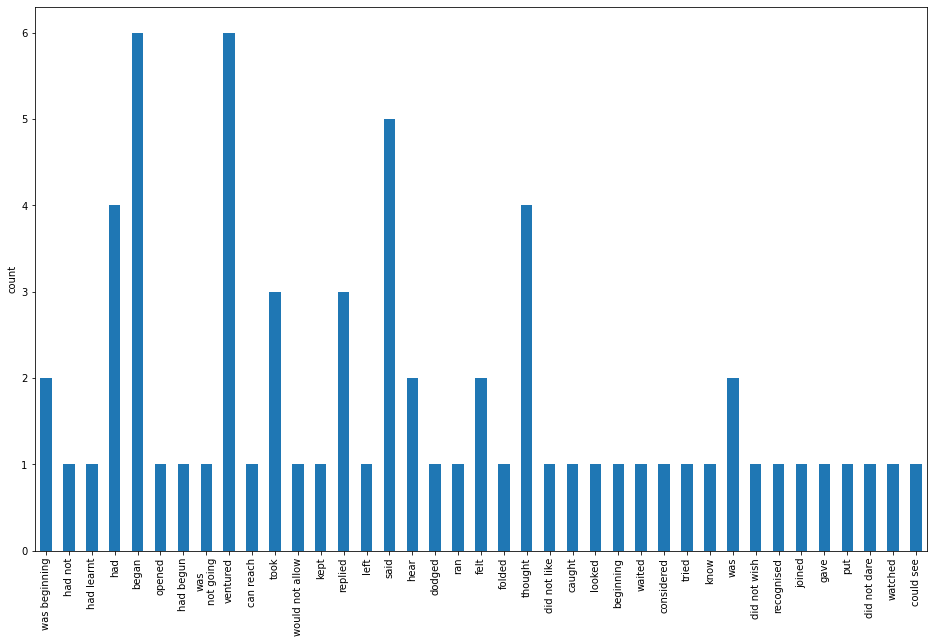

In [6]:
doc = nlp(text)
statements = textacy.extract.subject_verb_object_triples(doc)
d = {}
for statement in statements:
    if str(statement[0]) == "Alice":
        if str(statement[1]) in d.keys():
            d[str(statement[1])]+= 1
        else:
            d[str(statement[1])] = 1
s = pd.Series(d, index = d.keys())
s.plot(ylabel = "count", kind = "bar",figsize=(16,10))